In [1]:
import graphlab
import matplotlib.pyplot as plt

A newer version of GraphLab Create (v1.9) is available! Your current version is v1.8.3.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.
[INFO] GraphLab Create v1.8.3 started. Logging: /tmp/graphlab_server_1463701375.log


In [2]:
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/dsp/Classes/ML_CourseraSpecialization/regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.010831 secs.

In [3]:
sales.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


# Explore Data

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view = 'Scatter Plot', x = 'CrimeRate', y = 'HousePrice')

# Fit Regression Model Using CrimeRate as Predictor

In [5]:
crime_mod = graphlab.linear_regression.create(
    sales, target = 'HousePrice', features = ['CrimeRate'], validation_set = None, verbose = True)

Linear regression:

--------------------------------------------------------

Number of examples          : 99

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.005390     | 314982.574662      | 83468.940148  |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

## Visualize Fit

In [6]:
%matplotlib inline

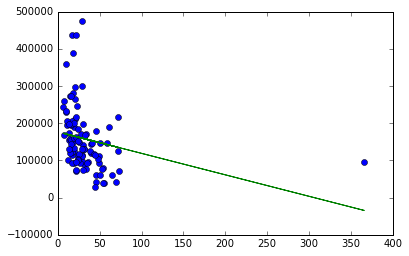

In [7]:
plt.plot(sales['CrimeRate'], sales['HousePrice'], 'o',
         sales['CrimeRate'], crime_mod.predict(sales), '-')

## Remove Outlier (City Center)

In [8]:
sales_noCC = sales[sales['MilesPhila'] != 0]

In [9]:
sales_noCC.show(view = 'Scatter Plot', x = 'CrimeRate', y = 'HousePrice')

## Refit to Reduced Data Set

In [10]:
crime_noCC_mod = graphlab.linear_regression.create(
    sales_noCC, target = 'HousePrice', features = ['CrimeRate'], validation_set = None, verbose = False)

### Visualize New Fit

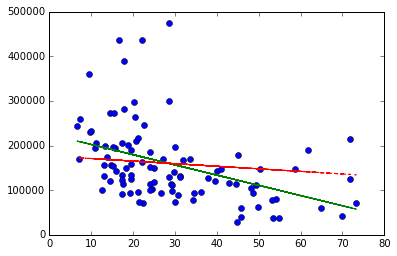

In [11]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], 'o',
         sales_noCC['CrimeRate'], crime_noCC_mod.predict(sales_noCC), '-',
         sales_noCC['CrimeRate'], crime_mod.predict(sales_noCC), '-.',)

## Compare Model Coefs

In [12]:
crime_mod.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [13]:
crime_noCC_mod.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


# Remove Most Expensive (high y) Values

In [14]:
sales_cheaper = sales_noCC[sales_noCC['HousePrice'] < 310000]

In [15]:
sales_cheaper.show(view = 'Scatter Plot', x = 'CrimeRate', y = 'HousePrice')

In [16]:
crime_cheaper_mod = graphlab.linear_regression.create(
    sales_cheaper, target = 'HousePrice', features = ['CrimeRate'], validation_set = None, verbose = False)

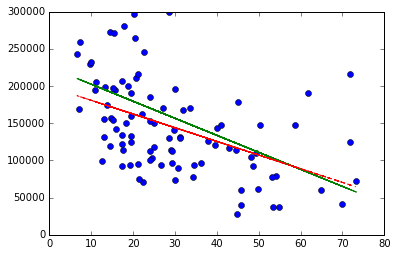

In [17]:
plt.plot(sales_cheaper['CrimeRate'], sales_cheaper['HousePrice'], 'o',
         sales_cheaper['CrimeRate'], crime_noCC_mod.predict(sales_cheaper), '-',
         sales_cheaper['CrimeRate'], crime_cheaper_mod.predict(sales_cheaper), '-.',) # <- new mod

In [18]:
crime_noCC_mod.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


In [19]:
crime_cheaper_mod.get('coefficients')

name,index,value,stderr
(intercept),None,199073.589615,11932.5101105
CrimeRate,None,-1837.71280989,351.519609333


In [20]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [21]:
train_data, test_data = sales.random_split(0.8, seed = 0)

In [22]:
def simple_linear_regression(data, input_feature, output):
    mod = graphlab.linear_regression.create(
        data, target = output, features = [input_feature], validation_set = None, verbose = False)
    intercept, slope = mod.get('coefficients')['value']
    return(intercept, slope)

In [23]:
sqft_coefs = simple_linear_regression(data = train_data, input_feature = 'sqft_living', output = 'price')
sqft_coefs

(-47114.02067021723, 281.9578501659882)

In [24]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = [intercept + slope*feature for feature in input_feature]
    return(predicted_output)

In [25]:
get_regression_predictions([2650], sqft_coefs[0], sqft_coefs[1])

[700074.2822696514]

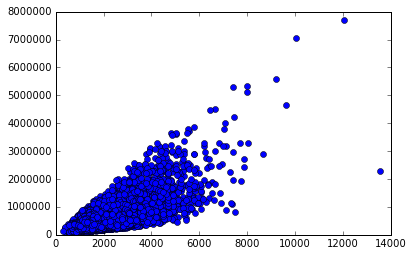

In [26]:
plt.plot(train_data['sqft_living'], train_data['price'], 'o')

In [27]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    predictions = [intercept + slope * feature for feature in input_feature]
    sq_error = [(pred - actual) ** 2 for (pred, actual) in zip(predictions, output)]
    RSS = sum(sq_error)
    return(RSS)

In [28]:
get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_coefs[0], sqft_coefs[1])

1201918356336386.5

In [29]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_input = (output - intercept) / slope
    return(estimated_input)

In [30]:
inverse_regression_predictions(800000, sqft_coefs[0], sqft_coefs[1])

3004.399487978513

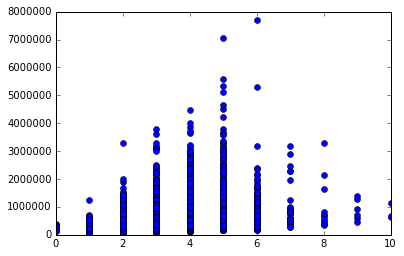

In [31]:
plt.plot(train_data['bedrooms'], train_data['price'], 'o')

In [32]:
bedroom_coefs = simple_linear_regression(data = train_data, input_feature = 'bedrooms', output = 'price')
bedroom_coefs

(109476.84460408357, 127587.86468855322)

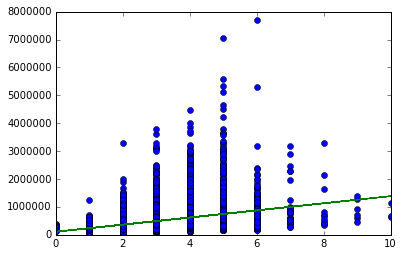

In [33]:
plt.plot(train_data['bedrooms'], train_data['price'], 'o',
         train_data['bedrooms'], get_regression_predictions(train_data['bedrooms'], 
                                                            bedroom_coefs[0], 
                                                            bedroom_coefs[1]), '-')

In [34]:
rss_sqft = get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'], sqft_coefs[0], sqft_coefs[1])
rss_sqft

275402888125772.4

In [35]:
rss_bedroom = get_residual_sum_of_squares(
    test_data['bedrooms'], test_data['price'], bedroom_coefs[0], bedroom_coefs[1])
rss_bedroom

493364344118745.7